<a href="https://colab.research.google.com/github/Dikshuy/hail_UMICaana/blob/master/Aanal_ResNet50_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import cv2
import os
from google.colab import drive
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from google.colab.patches import cv2_imshow
drive.mount('/content/drive')
%cd '/content/drive/My Drive/Letters'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Letters


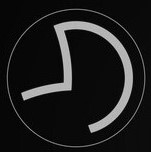

In [8]:

symbols = []
alphabets = []
#X_img = []
img_path = '/content/drive/My Drive/Letters'
for file in os.listdir('/content/drive/My Drive/Letters'):
  thresh = cv2.imread(os.path.join(img_path, file), 0)
#  thresh = cv2.cvtColor(thresh, cv2.COLOR_BGR2HSV)
#  _, thresh = cv2.threshold(img, 155, 255, cv2.THRESH_BINARY)
#  canny = cv2.Canny(thresh, 155, 255)
#  cv2_imshow(canny)
  symbols.append(thresh)

  if file == "C2.jpg":
    alphabets.append("C")
  else:
    alphabets.append(file[0])

#  if file == "a2.jpg":
#    a_img = thresh 
cv2_imshow(symbols[7])



In [9]:

encoder = np.array(alphabets)

label_encoder = LabelEncoder()
integer_encoder = label_encoder.fit_transform(encoder)
#print(alphabets)

one_hot = to_categorical(integer_encoder)
#print(one_hot)
data = []
label = []

#for j in range(len(one_hot)):
"""print(len(one_hot))
print(one_hot[:])
for i in range(18):
  cv2_imshow(symbols[i])"""

'print(len(one_hot))\nprint(one_hot[:])\nfor i in range(18):\n  cv2_imshow(symbols[i])'

In [10]:
for j in range(len(symbols)):
  for i in range(-4, 5):
    rows, cols = symbols[j].shape[:2]
    M = cv2.getRotationMatrix2D((cols/2, rows/2), 5*i, 1)
    res = cv2.warpAffine(symbols[j], M, (rows, cols))
    label.append(one_hot[j])
    #print(one_hot[0][j])
    data.append(res)
    
#print(label[70])
#cv2_imshow(data[70]) 
print(len(label), len(data))

num = len(label)


162 162


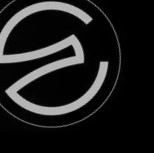

In [11]:
for j in range(num):
  height, width = data[j].shape[:2]

  dis_y, dis_x = height//7, width//7
  T = np.float32([[1, 0, dis_x], [0, 1, dis_y]])

  img_trans = cv2.warpAffine(data[j], T, ( width, height))
  data.append(img_trans)
  label.append(label[j])

  T = np.float32([[1, 0, -dis_x], [0, 1, -dis_y]])

  img_trans = cv2.warpAffine(data[j], T, ( width, height))
  data.append(img_trans)
  label.append(label[j])

cv2_imshow(data[-1])
#print(label[-1])
#cv2_imshow(data[170])
#print(label[170])

In [12]:
for j in range(num):
  for i in range(7, 13, 2):
    res_img = cv2.GaussianBlur(data[j], (i, i), 0)
    data.append(res_img)
    label.append(label[j])
    
print(len(label), len(data))

for j in range(num):
  res_img = cv2.medianBlur(data[j], 11)
  data.append(res_img)
  label.append(label[j])

print(len(label), len(data))

#print(len(label), len(data))
#cv2_imshow(data[650])
#print(label[650]) 
#cv2_imshow(data[15])


#print(len(label), len(data))
#print(label[1500])
#cv2_imshow(data[1500])

972 972
1134 1134


In [13]:
for j in range(num):
  for i in range(9, 13, 2):
    res_img = cv2.bilateralFilter(data[j], i, 200, 200)
    data.append(res_img)
    label.append(label[j])

print(len(label), len(data))

1458 1458


In [14]:
for j in range(num):
  res_img = cv2.erode(data[j], np.ones((3,3)), iterations = 1)
  data.append(res_img)
  label.append(label[j])
  #cv2_imshow(res_img)
print(len(label), len(data))

1620 1620


In [15]:
for j in range(num):
  res_img = cv2.dilate(data[j], np.ones((5, 5), np.uint8), iterations = 1)
  data.append(res_img)
  label.append(label[j])

print(len(label), len(data))

1782 1782


In [16]:
"""for j in range(num):
  
  for i in range(1,7,2):
    img7 = cv2.dilate(img7, np.ones((i, i), np.uint8), iterations =1)
    img7 = cv2.erode(data[j], np.ones((i, i), np.uint8), iterations =1)
    data.append(img7)
    cv2_imshow(img7)
    label.append(label[j])
#  cv2_imshow(data[j])
#cv2_imshow(data[4112])
#print(label[4112])
#print(len(label), len(data))"""

'for j in range(num):\n  \n  for i in range(1,7,2):\n    img7 = cv2.dilate(img7, np.ones((i, i), np.uint8), iterations =1)\n    img7 = cv2.erode(data[j], np.ones((i, i), np.uint8), iterations =1)\n    data.append(img7)\n    cv2_imshow(img7)\n    label.append(label[j])\n#  cv2_imshow(data[j])\n#cv2_imshow(data[4112])\n#print(label[4112])\n#print(len(label), len(data))'

In [17]:
"""for j in range(num):
  data.append(cv2.pyrDown(data[j]))
  label.append(label[j])
  data.append(cv2.pyrUp(data[j]))
  label.append(label[j])
#  cv2_imshow(cv2.pyrDown(data[j]))
#print(len(label), len(data))"""


'for j in range(num):\n  data.append(cv2.pyrDown(data[j]))\n  label.append(label[j])\n  data.append(cv2.pyrUp(data[j]))\n  label.append(label[j])\n#  cv2_imshow(cv2.pyrDown(data[j]))\n#print(len(label), len(data))'

In [18]:
"""for j in range(num):
  img  = cv2.pyrDown(data[j])
  img = cv2.pyrDown(img)
  img = cv2.pyrUp(img)
  img = cv2.dilate(img, np.ones((3, 3), np.uint8), iterations = 1 )
  data.append(img)
  label.append(label[j])

data[-5] = cv2.resize(data[-5], (224, 224))

cv2_imshow(data[-5])

print(label[-5])"""

'for j in range(num):\n  img  = cv2.pyrDown(data[j])\n  img = cv2.pyrDown(img)\n  img = cv2.pyrUp(img)\n  img = cv2.dilate(img, np.ones((3, 3), np.uint8), iterations = 1 )\n  data.append(img)\n  label.append(label[j])\n\ndata[-5] = cv2.resize(data[-5], (224, 224))\n\ncv2_imshow(data[-5])\n\nprint(label[-5])'

In [19]:
import numpy as np
for i in range(len(data)):
  data[i] = cv2.resize(data[i], (128, 128))
data = np.array(data)
data = np.reshape(data, (data.shape[0], 128, 128, 1))
label = np.array(label)
print(label.shape)
print(data.shape)

(1782, 17)
(1782, 128, 128, 1)


In [20]:
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input, ZeroPadding2D, BatchNormalization, Add
from keras.models import Model
from tensorflow.keras.losses import MAE
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D
from tensorflow.keras import Input
from tensorflow.keras.utils import plot_model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import Activation, Dropout, Flatten, Dense 
from keras import backend as K 
import keras
from keras.initializers import glorot_uniform


In [21]:
def identity_block(X, f, filters, stage, block):
    
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    # Retrieve Filters
    F1, F2, F3 = filters

    # Save the input value. You'll need this later to add back to the main path. 
    X_shortcut = X

    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    
    # Second component of main path (≈3 lines)
    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # Third component of main path (≈2 lines)
    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation (≈2 lines)
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    
    return X

In [22]:

# GRADED FUNCTION: convolutional_block

def convolutional_block(X, f, filters, stage, block, s = 2):
    
    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    # Retrieve Filters
    F1, F2, F3 = filters

    # Save the input value
    X_shortcut = X

    # First component of main path 
    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    
    # Second component of main path (≈3 lines)
    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # Third component of main path (≈2 lines)
    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    ##### SHORTCUT PATH #### (≈2 lines)
    X_shortcut = Conv2D(filters=F3, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '1', kernel_initializer=glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis=3, name=bn_name_base + '1')(X_shortcut)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation (≈2 lines)
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X
    

In [38]:
# GRADED FUNCTION: ResNet50

def ResNet50(input_shape = (128, 128, 1), classes = 17):
    
    X_input = Input(input_shape)

    # Zero-Padding
    X = ZeroPadding2D((3, 3))(X_input)

    # Stage 1
    X = Conv2D(64, (5, 5), strides=(2, 2), name='conv1', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    
    # Stage 2
    X = convolutional_block(X, f=3, filters=[64, 64, 128], stage=2, block='a', s=1)
    X = identity_block(X, 3, [64, 64, 128], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 128], stage=2, block='c')
    X = identity_block(X, 3, [64, 64, 128], stage=2, block='d')
    X = identity_block(X, 3, [64, 64, 128], stage=2, block='e')

    
    # Stage 3 (≈4 lines)
    X = convolutional_block(X, f=3, filters=[128, 128, 256], stage=3, block='a', s=2)
    X = identity_block(X, 3, [128, 128, 256], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 256], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 256], stage=3, block='d')


    # Stage 4 (≈6 lines)
    X = convolutional_block(X, f=3, filters=[256, 256, 512], stage=4, block='a', s=2)
    X = identity_block(X, 3, [256, 256, 512], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 512], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 512], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 512], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 512], stage=4, block='f')
    
    # Stage 5 (≈3 lines)
    X =  convolutional_block(X, f=3, filters=[512, 512, 1024], stage=5, block='a', s=2)
    X = identity_block(X, 3, [512, 512, 1024], stage=5, block='b')
    X = identity_block(X, 3, [512, 512, 1024], stage=5, block='c')
    X = identity_block(X, 3, [512, 512, 1024], stage=5, block='d')

    
    
    # AVGPOOL (≈1 line). Use "X = AveragePooling2D(...)(X)"
    X = AveragePooling2D(pool_size=(2, 2), padding='same')(X)

    
    # output layer
    X = Flatten()(X)
    X = Dense(100, activation = 'relu')(X)
    X = BatchNormalization()(X)
    X = Dense(classes, activation='softmax', name='fc' + str(classes), kernel_initializer=glorot_uniform(seed=0))(X)

    # Create model
    model = Model(inputs=X_input, outputs=X, name='ResNet50')

    return model

In [39]:
model = ResNet50(input_shape = (128, 128, 1), classes = 17)

In [40]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [41]:
from sklearn .model_selection import train_test_split
from sklearn.utils import shuffle
X_train, X_test, Y_train, Y_test = train_test_split(data, label, random_state= 29, test_size = 0.2)
#X_train, Y_train = shuffle(data, label)
history = model.fit(X_train, Y_train, epochs = 40, batch_size = 100)

Epoch 1/40
15/15 [==============================] - 7s 497ms/step - loss: 2.7616 - accuracy: 0.1460
Epoch 2/40
15/15 [==============================] - 7s 500ms/step - loss: 1.9252 - accuracy: 0.4351
Epoch 3/40
15/15 [==============================] - 7s 498ms/step - loss: 0.6341 - accuracy: 0.8800
Epoch 4/40
15/15 [==============================] - 7s 500ms/step - loss: 0.1242 - accuracy: 0.9937
Epoch 5/40
15/15 [==============================] - 8s 501ms/step - loss: 0.0354 - accuracy: 1.0000
Epoch 6/40
15/15 [==============================] - 8s 502ms/step - loss: 0.0190 - accuracy: 1.0000
Epoch 7/40
15/15 [==============================] - 8s 502ms/step - loss: 0.0135 - accuracy: 1.0000
Epoch 8/40
15/15 [==============================] - 8s 502ms/step - loss: 0.0106 - accuracy: 1.0000
Epoch 9/40
15/15 [==============================] - 8s 503ms/step - loss: 0.0092 - accuracy: 1.0000
Epoch 10/40
15/15 [==============================] - 8s 503ms/step - loss: 0.0084 - accuracy: 1.0000

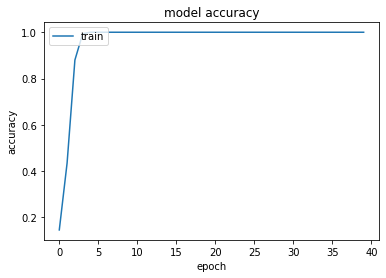

In [42]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [43]:


#img = cv2.imread('/content/drive/My Drive/a2.png', 0)
#X_test = preprocess(img)
preds = model.evaluate(X_test, Y_test)
print(preds)


12/12 [==============================] - 1s 59ms/step - loss: 0.0033 - accuracy: 1.0000
[0.0032504291739314795, 1.0]


In [44]:
def preprocess(img, alpha, beta):
  img = cv2.resize(img, (128, 128))
  new_img = np.zeros(img.shape, img.dtype)
#  alpha = 0.8
#  beta = 20
  print(img.shape)
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      new_img[i, j] = np.clip(img[i, j]*alpha+ beta, 0,255)
#  thresh = np.array(img)
  cv2_imshow(new_img)
  thresh = np.reshape(new_img, (1, 128, 128, 1))
  print(thresh.shape)
#  X_test = np.reshape(thresh, (1, 128, 128, 1))
  return thresh



(128, 128)


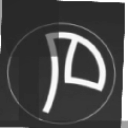

(1, 128, 128, 1)
[[4.4119549e-03 8.2200184e-02 7.9015183e-01 1.6448773e-02 5.6945940e-04
  7.6096896e-03 7.5112605e-03 9.7182579e-03 7.5278981e-03 7.3409718e-03
  3.1578909e-03 1.4026226e-02 5.0531668e-03 2.9459674e-02 4.7453842e-03
  1.3784440e-03 8.6888773e-03]]


In [45]:

img1 = cv2.imread('/content/drive/My Drive/b1.png', 0)
#cv2_imshow(img1)
X_test = preprocess(img1, 1.5, 40)
preds = model.predict(X_test)
print(preds)


In [46]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")



Saved model to disk
